In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/final_guvi project.csv')
data.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
# Here I change the columns name 
data.rename(columns={
    'age'           :   'Age',
    'job'           :   'Job',
    'call_type'     :   'Call_type',
    'day'           :   'Day',
    'marital'       :   'Marital status',
    'education_qual':   'Educational qualification',
    'mon'           :   'Month',
    'dur'           :   'Duration in seconds',
    'num_calls'     :   'Number of calls',
    'prev_outcome'  :   'Prev_outcome',
    'y'             :   'Target'
    },inplace =True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        45211 non-null  int64 
 1   Job                        45211 non-null  object
 2   Marital status             45211 non-null  object
 3   Educational qualification  45211 non-null  object
 4   Call_type                  45211 non-null  object
 5   Day                        45211 non-null  int64 
 6   Month                      45211 non-null  object
 7   Duration in seconds        45211 non-null  int64 
 8   Number of calls            45211 non-null  int64 
 9   Prev_outcome               45211 non-null  object
 10  Target                     45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
data.dtypes

Age                           int64
Job                          object
Marital status               object
Educational qualification    object
Call_type                    object
Day                           int64
Month                        object
Duration in seconds           int64
Number of calls               int64
Prev_outcome                 object
Target                       object
dtype: object

1.Checking Unique values

2.Checking Null values

3.Checking Duplicate values

In [ ]:
# 1. Checking the unique values

for col in data.dtypes.index:
  if data[col].dtype=='object':
    print('\n Total unique values inn the columns {} is'.format(col),data[col].nunique())
    


 Total unique values inn the columns Job is 12

 Total unique values inn the columns Marital status is 3

 Total unique values inn the columns Educational qualification is 4

 Total unique values inn the columns Call_type is 3

 Total unique values inn the columns Month is 12

 Total unique values inn the columns Prev_outcome is 4

 Total unique values inn the columns Target is 2


In [ ]:
# 2. Checking the Null Values:

data.isna().sum()

Age                          0
Job                          0
Marital status               0
Educational qualification    0
Call_type                    0
Day                          0
Month                        0
Duration in seconds          0
Number of calls              0
Prev_outcome                 0
Target                       0
dtype: int64

In [ ]:
# 3.Checking the duplicate values

duplicates=data[data.duplicated()]
print('Duplicate values in the data set',duplicates.shape)


# After checking found 6 duplicate row so here i drop the duplicate rows

data = data.drop_duplicates()  
data.shape



Duplicate values in the data set (6, 11)


(45205, 11)

In [ ]:
# Let's check the dataset is Balanced or Imbalanced
print("Unique values : ", data['Target'].unique())
print("Unique values counts : \n", data['Target'].value_counts())

Unique values :  ['no' 'yes']
Unique values counts : 
 no     39916
yes     5289
Name: Target, dtype: int64


<Axes: xlabel='Target', ylabel='count'>

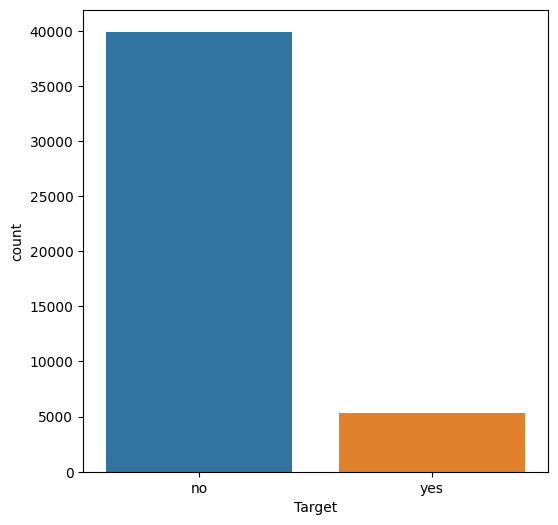

In [ ]:
# Let's plot the Unique value counts
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Target', data = data)

 Let's Explore each and every factors

In [ ]:
j=1
for i in data.columns:
  print(j,'.',i)
  j=j+1

1 . Age
2 . Job
3 . Marital status
4 . Educational qualification
5 . Call_type
6 . Day
7 . Month
8 . Duration in seconds
9 . Number of calls
10 . Prev_outcome
11 . Target


In [ ]:
data.describe().style.background_gradient(cmap='PuBu_r')

,Age,Day,Duration in seconds,Number of calls
count,45205.000000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.806880,258.183055,2.763898
std,10.619130,8.322340,257.538504,3.098189
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
for col in data.dtypes.index:
  if data[col].dtype=='object':
    print('\n Total unique values inn the columns {} is \n'.format(col),data[col].value_counts())


 Total unique values inn the columns Job is 
 blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: Job, dtype: int64

 Total unique values inn the columns Marital status is 
 married     27210
single      12788
divorced     5207
Name: Marital status, dtype: int64

 Total unique values inn the columns Educational qualification is 
 secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: Educational qualification, dtype: int64

 Total unique values inn the columns Call_type is 
 cellular     29282
unknown      13017
telephone     2906
Name: Call_type, dtype: int64

 Total unique values inn the columns Month is 
 may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar     

Visualization

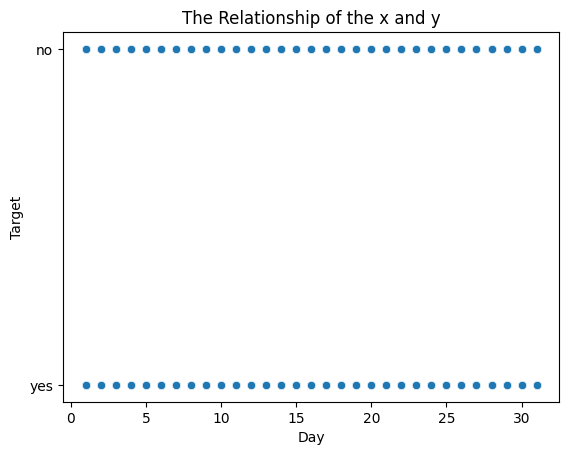

In [ ]:
sns.scatterplot(x='Day',y='Target',data=data)
plt.xlabel('Day')
plt.ylabel('Target')
plt.title("The Relationship of the x and y")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

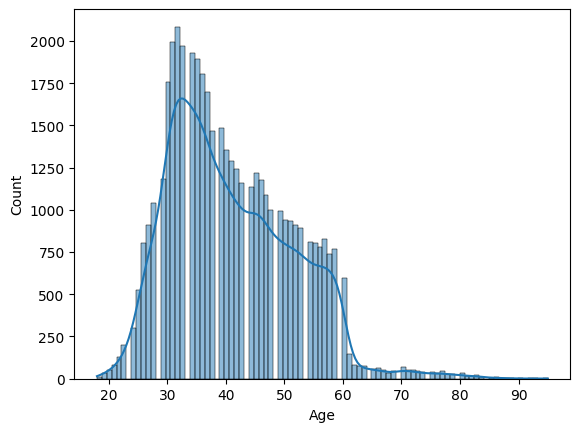

In [ ]:
sns.histplot(data=data['Age'],kde=True)

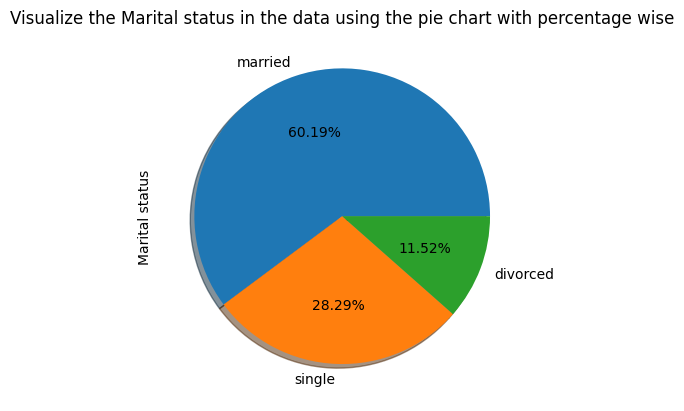

In [ ]:
#Visualize the fact content in the data using the pie chart with differnt colors with percentages
data['Marital status'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
    autopct='%1.2f%%',
    shadow=True)
plt.title("Visualize the Marital status in the data using the pie chart with percentage wise")
plt.show()

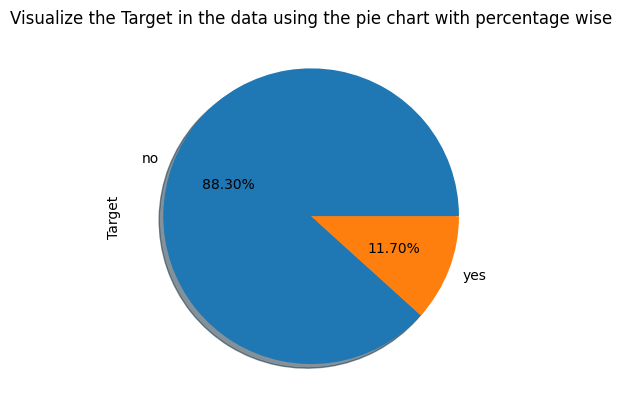

In [ ]:
data['Target'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
    autopct='%1.2f%%',
    shadow=True)
plt.title("Visualize the Target in the data using the pie chart with percentage wise")
plt.show()

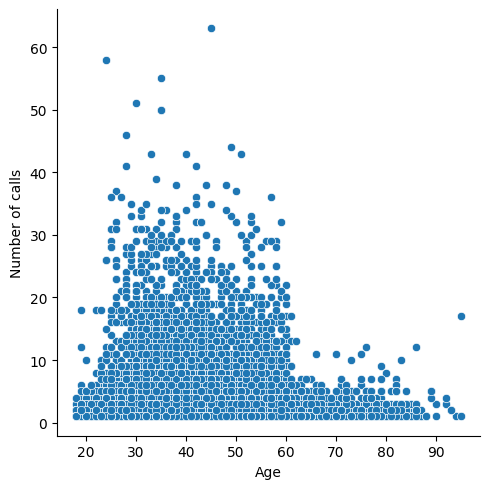

In [ ]:

sns.relplot(x ="Age", y ="Number of calls",
             data = data);

<Axes: xlabel='Number of calls', ylabel='Density'>

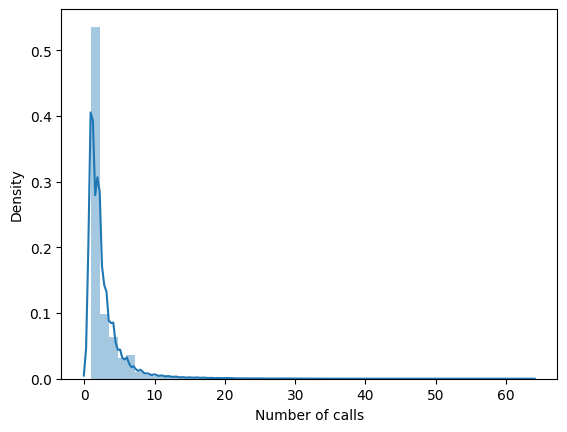

In [ ]:
sns.distplot(data['Number of calls'])

<Axes: >

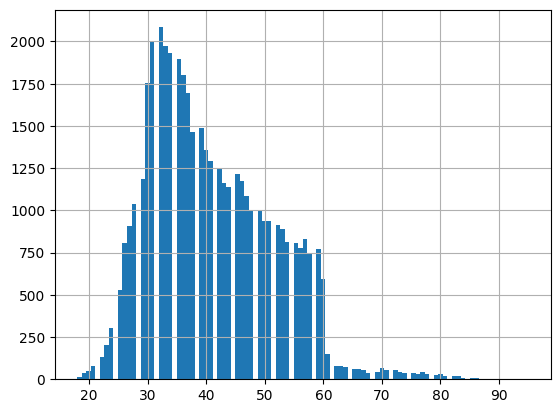

In [ ]:

data["Age"].hist(bins=100)

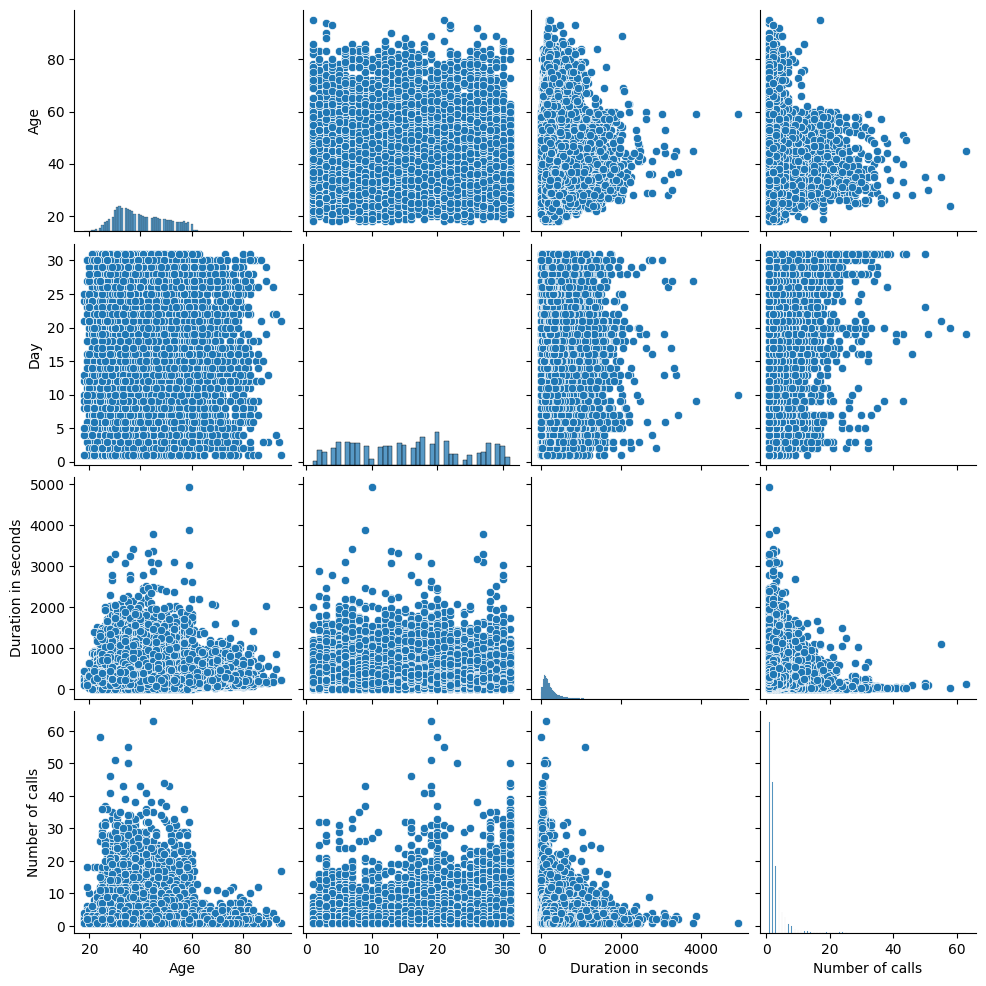

In [ ]:
sns.pairplot(data)

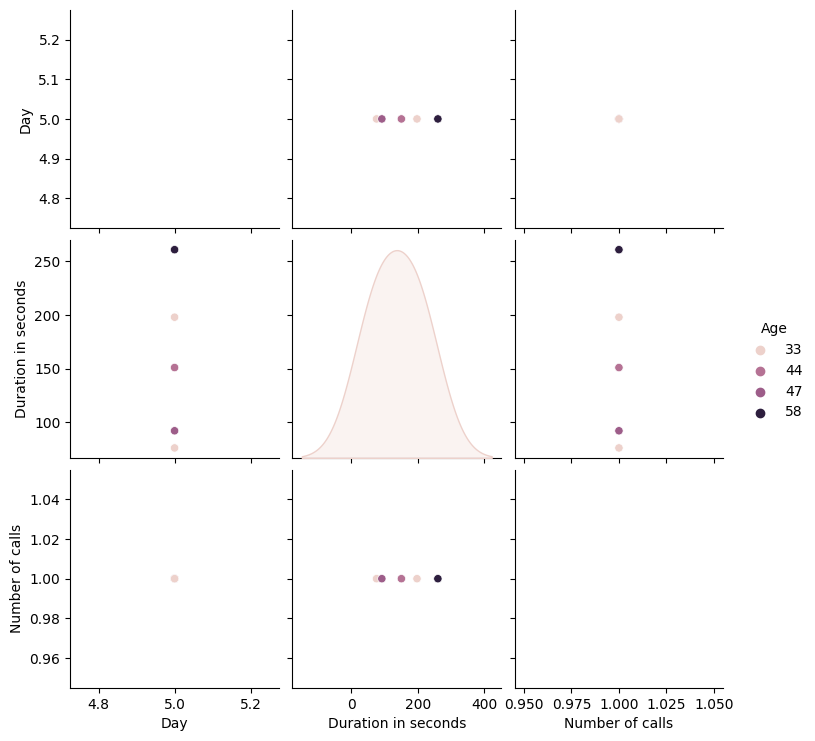

In [ ]:
sns.pairplot(data.head(), hue = 'Age')

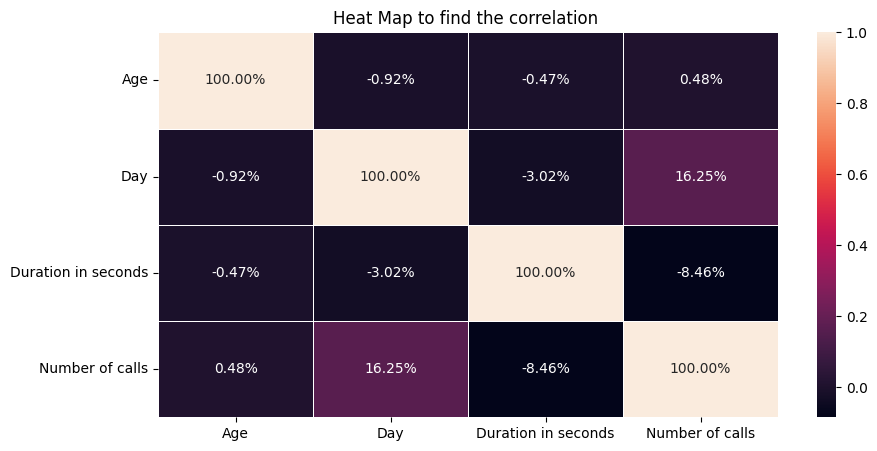

In [ ]:
#Correlation  using heatmap 
corr=data.corr()
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot=True,linewidths=.7,fmt = '.2%')
plt.title("Heat Map to find the correlation ")
plt.show()

In [ ]:
# data.groupby('Marital status')['Target'].value_counts()
# data.groupby(['Marital status','Call_type'])['Target'].value_counts()
data.groupby(['Marital status','Educational qualification'])['Target'].value_counts()
# data.groupby(['Prev_outcome'])['Target'].value_counts()
# data.groupby('Number of calls')['Target'].value_counts()

In [ ]:
#Convert the categorys to the numerical using the labelencoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Job']=label.fit_transform(data['Job'])
data['Marital status']=label.fit_transform(data['Marital status'])
data['Educational qualification']=label.fit_transform(data['Educational qualification'])
data['Call_type']= label.fit_transform(data['Call_type'])
data['Month']=label.fit_transform(data['Month'])
data['Prev_outcome']=label.fit_transform(data['Prev_outcome'])
data['Target']=label.fit_transform(data['Target'])

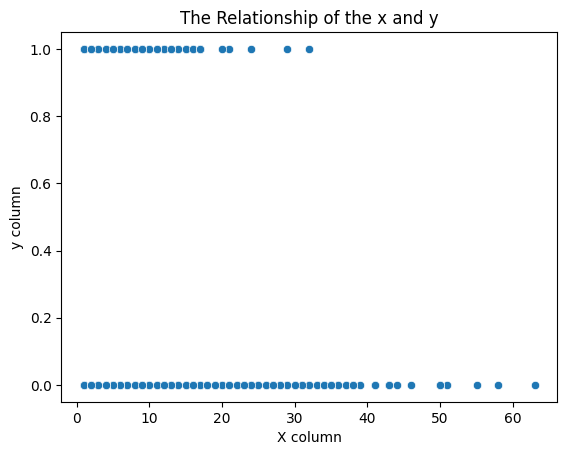

In [ ]:
sns.scatterplot(x='Number of calls',y='Target',data=data)
plt.xlabel('X column')
plt.ylabel('y column')
plt.title("The Relationship of the x and y")
plt.show()

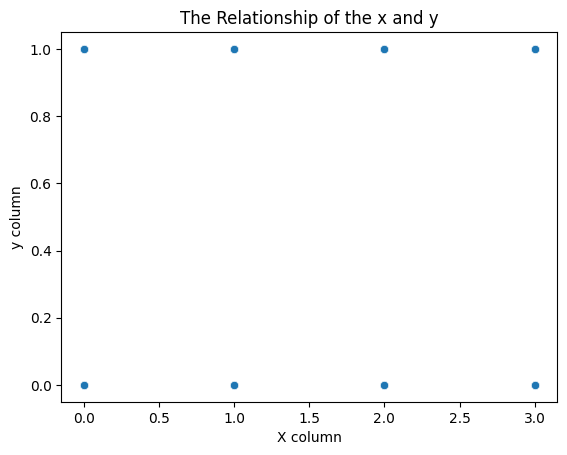

In [ ]:
sns.scatterplot(x='Prev_outcome',y='Target',data=data)
plt.xlabel('X column')
plt.ylabel('y column')
plt.title("The Relationship of the x and y")
plt.show()

In [ ]:
X = data.iloc[:,:-1]
y = data.Target
X.head()

,Age,Job,Marital status,Educational qualification,Call_type,Day,Month,Duration in seconds,Number of calls,Prev_outcome
0,58,4,1,2,2,5,8,261,1,3
1,44,9,2,1,2,5,8,151,1,3
2,33,2,1,1,2,5,8,76,1,3
3,47,1,1,3,2,5,8,92,1,3
4,33,11,2,3,2,5,8,198,1,3


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
   ('std_scalar', StandardScaler())  # Normalization concept
])


X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)
X_test

array([[ 0.76775343, -0.7155781 ,  1.36947093, ..., -0.425761  ,
        -0.57391563,  0.44753714],
       [-0.55901282,  1.42410161,  1.36947093, ..., -0.63276944,
        -0.57391563,  0.44753714],
       [ 2.47359575,  0.20142749, -1.91541848, ..., -0.37975913,
        -0.24312754,  0.44753714],
       ...,
       [-0.65378184, -1.02124663, -0.27297378, ..., -0.13441579,
        -0.24312754,  0.44753714],
       [ 1.24159852,  0.20142749, -0.27297378, ..., -0.51776475,
         0.08766055,  0.44753714],
       [-0.36947479, -1.32691516,  1.36947093, ..., -0.93178162,
         3.39554147,  0.44753714]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:

y_predict= model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X = data.drop(['Target'], axis=1)
y = data['Target']

In [ ]:
Target_count = y.value_counts()
Target_count


0    39916
1     5289
Name: Target, dtype: int64

<Axes: ylabel='Target'>

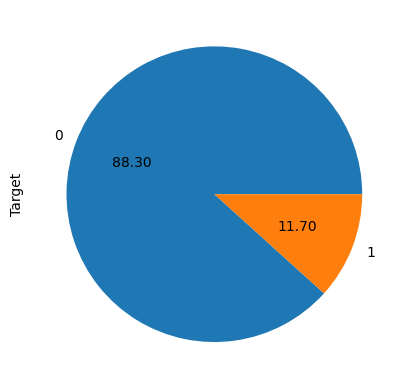

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

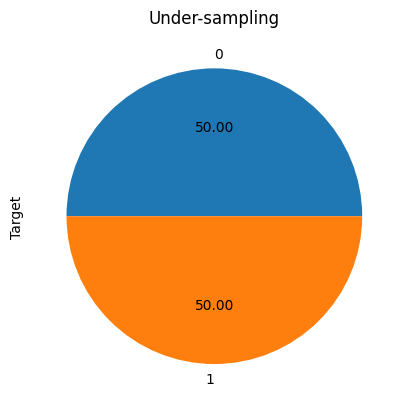

In [ ]:

from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)


ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)   

0.8892493732487834


col_0,0,1
Target,,
0,11769,207
1,1295,291


In [ ]:

y_predict= model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

model.predict_proba(X_test)[:,1]

array([0.1267951 , 0.03142213, 0.07053162, ..., 0.01877489, 0.03880164,
       0.00341409])

In [ ]:
def predict_threshold (model,X_test,thresholds):
   import numpy as np
   
   return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) 

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1): 
   y_predict = predict_threshold(model,X_test,thr)
   print("Threshold :",thr)
   print(confusion_matrix(y_test,y_predict)) 

Threshold : 0.0
[[    0 11976]
 [    0  1586]]
Threshold : 0.1
[[8472 3504]
 [ 279 1307]]
Threshold : 0.2
[[10838  1138]
 [  777   809]]
Threshold : 0.30000000000000004
[[11445   531]
 [ 1034   552]]
Threshold : 0.4
[[11662   314]
 [ 1193   393]]
Threshold : 0.5
[[11769   207]
 [ 1295   291]]
Threshold : 0.6000000000000001
[[11832   144]
 [ 1386   200]]
Threshold : 0.7000000000000001
[[11877    99]
 [ 1448   138]]
Threshold : 0.8
[[11911    65]
 [ 1490    96]]
Threshold : 0.9
[[11940    36]
 [ 1533    53]]


In [ ]:
import numpy as np
y_predict_th2 = np.where(model.predict_proba(X_test)[:,1]>0.2,1,0)
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4
y_predict_th5 = np.where(model.predict_proba(X_test)[:,1]>0.5,1,0)
y_predict_th6 = np.where(model.predict_proba(X_test)[:,1]>0.6,1,0)
y_predict_th7 = np.where(model.predict_proba(X_test)[:,1]>0.7,1,0)
y_predict_th4 

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
Target,,
0,11662,314
1,1193,393


In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predict_th2))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     11976
           1       0.42      0.51      0.46      1586

    accuracy                           0.86     13562
   macro avg       0.67      0.71      0.69     13562
weighted avg       0.87      0.86      0.86     13562



In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predict_th3))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11976
           1       0.51      0.35      0.41      1586

    accuracy                           0.88     13562
   macro avg       0.71      0.65      0.67     13562
weighted avg       0.87      0.88      0.87     13562



In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predict_th5))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11976
           1       0.58      0.18      0.28      1586

    accuracy                           0.89     13562
   macro avg       0.74      0.58      0.61     13562
weighted avg       0.86      0.89      0.86     13562



In [ ]:
print (classification_report(y_test, y_predict_th6))
print (classification_report(y_test, y_predict_th7))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11976
           1       0.58      0.13      0.21      1586

    accuracy                           0.89     13562
   macro avg       0.74      0.56      0.57     13562
weighted avg       0.86      0.89      0.85     13562

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11976
           1       0.58      0.09      0.15      1586

    accuracy                           0.89     13562
   macro avg       0.74      0.54      0.55     13562
weighted avg       0.86      0.89      0.85     13562



In [ ]:

from sklearn.metrics import classification_report
print (classification_report(y_test, y_predict_th3))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11976
           1       0.51      0.35      0.41      1586

    accuracy                           0.88     13562
   macro avg       0.71      0.65      0.67     13562
weighted avg       0.87      0.88      0.87     13562



In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:

tpr,fpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
thresholds

array([1.99993857e+00, 9.99938566e-01, 9.99791415e-01, ...,
       1.03180417e-02, 1.03143303e-02, 5.05978050e-05])

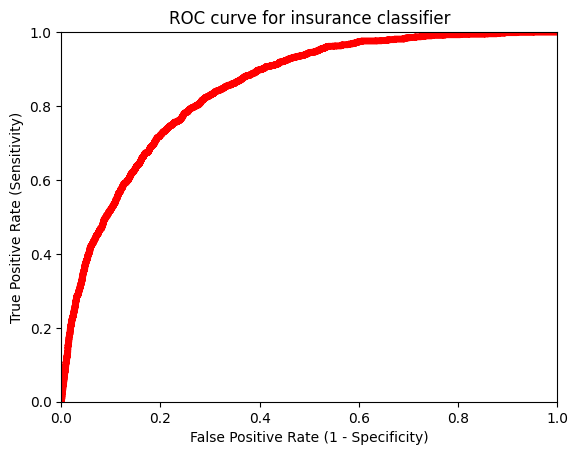

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for insurance classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [ ]:
roc_auc_score(y_test, y_predict)

0.5152056951229066

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
print(model1.intercept_)
print(model1.coef_)


[-2.5567398]
[[ 0.22820188  0.08596126  0.22857588  0.20083646 -0.66009986 -0.03967464
   0.04970473  0.9743274  -0.35395368 -0.11967118]]


In [ ]:
model1.predict([[44,2,1,2,2,5,8,35,1,3]])

array([1])

In [ ]:
score = model1.score(X_test,y_test)
print(score)
print(score * 100,"%")

0.8892493732487834
88.92493732487834 %


In [ ]:
y_pred = model1.predict(X_test)
print(y_pred)
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[0 0 0 ... 0 0 0]
Mean Absolute Error: 0.11075062675121664
Mean Squared Error: 0.11075062675121664
Root Mean Squared Error: 0.33279216750280743


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (31643, 10) (31643,)
Test set: (13562, 10) (13562,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

k = 4
#Train Model and Predict 
model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model


KNeighborsClassifier(n_neighbors=4)

In [ ]:
yhat = model.predict(X_test)
yhat


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model1.predict([[44,2,1,2,2,5,8,35,1,3]])

array([1])

In [ ]:
K = 4
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
  
   #Train Model and Predict 
   neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
   yhat=neigh.predict(X_test)
   mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


  
   #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


print(mean_acc)

[0.85083321 0.88113848 0.87302758]


In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.8811384751511576 with k= 2


In [ ]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob1a = model1.predict_proba(X_train) 
pred_prob2a = model2.predict_proba(X_train) 


In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr1a, tpr1a, thresh1a = roc_curve(y_train, pred_prob1a[:,1], pos_label=1)
fpr2a, tpr2a, thresh2a = roc_curve(y_train, pred_prob2a[:,1], pos_label=1)


In [ ]:
model2.predict([[44,2,1,2,2,5,8,35,1,3]])

array([0])

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score1a = roc_auc_score(y_train, pred_prob1a[:,1])
auc_score2a = roc_auc_score(y_train, pred_prob2a[:,1])



print("Logistic Regression   Test   score is  :",auc_score1)
print("Logistic Regression   Train  score is :",auc_score1a)



Logistic Regression   Test   score is  : 0.8066907717881071
Logistic Regression   Train  score is : 0.8203427055543588


In [ ]:
print("K Nearest Neighbours  Test   Score is :",auc_score2)
print("K Nearest Neighbours  Train  score is :",auc_score2a)

K Nearest Neighbours  Test   Score is : 0.7320830265538915
K Nearest Neighbours  Train  score is : 0.942001144373494


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model3= DecisionTreeClassifier(criterion="gini", max_depth = 4)
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
model3.predict([[44,2,1,2,2,5,8,35,1,3]])

array([0])

In [ ]:
pred_prob3 = model3.predict_proba(X_test)
pred_prob3a = model3.predict_proba(X_train) 

In [ ]:
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr3a, tpr3a, thresh3a = roc_curve(y_train, pred_prob3a[:,1], pos_label=1)

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score3a = roc_auc_score(y_train, pred_prob3a[:,1])
print("Decision tree test Score is :",auc_score3)
print("Decision tree train score is :",auc_score3a)

Decision tree test Score is : 0.8165602340450615
Decision tree train score is : 0.8253786152556207


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model4.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9007


In [ ]:
model4.predict([[44,2,1,2,2,5,8,35,1,3]])

array([0])

In [ ]:

pred_prob4 = model4.predict_proba(X_test) 
pred_prob4a = model4.predict_proba(X_train) 

In [ ]:
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr4a, tpr4a, thresh4a = roc_curve(y_train, pred_prob4a[:,1], pos_label=1)

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score4a = roc_auc_score(y_train, pred_prob4a[:,1])
print("Random forest test  score is :",auc_score4)
print("Random forest train score is :",auc_score4a)

Random forest test  score is : 0.9243753736332863
Random forest train score is : 1.0


In [ ]:
print("K Nearest Neighbours Test Score  is  :",auc_score2)
print("Logistic Regression  Test Score  is  :",auc_score1)
print("Decision tree        Test Score  is  :",auc_score3)
print("Random Forest        Test Score  is  :",auc_score4)

K Nearest Neighbours Test Score  is  : 0.7320830265538915
Logistic Regression  Test Score  is  : 0.8066907717881071
Decision tree        Test Score  is  : 0.8165602340450615
Random Forest        Test Score  is  : 0.9243753736332863
